# SCIKIT-LEARN TUTORIALS FOR BEGINNERS

## PART 1 - PROJECT SCOPING - DATA COLLECTION


**CONTENTS**

- [Scikit-learn Datasets - Introduction](#introduction)
- [Toy Datasets](#toy)
- [Toy Datasets](#toy)
- [Data Generator](#generator)
- [Special Data - Eigenfaces](#eigenfaces)


<a id='introduction'></a>

## 1. SCIKIT-LEARN DATASETS - INTRODUCTION

Scikit-learn offers many different types of datasets as a strong starting point for users to learn Machine Learning (ML). They are clean and ready for training ML model.
Options includes:
- A few small standard datasets called **Toy datasets**.
- Data generators: User can make some datasets with their own distribution.
- Other special dataset: the eigenfaces.

In [24]:
### import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import Scikit-learn datasets
from sklearn import datasets

<a id='toy'></a>
## 2. TOY DATASETS

In [3]:
### A list of some toy datasets
for item in dir(datasets):
    vals = item.split('_')
    if vals[0] == "load":
        print(item)

load_boston
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


### Example: The iris data

In [16]:
# Load the iris dataset using load_iris()
iris = datasets.load_iris()
print("The physical location of the dataset:{} \n{}".format(iris.filename, '-'*20))
print("Data description:")
# Understand the data
print(iris.DESCR)

The physical location of the dataset:/opt/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv 
--------------------
Data description:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.

In [63]:
### Looking at the dataset as the dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
# include the label column
df['label'] = iris.target
print("Iris plants dataset")
print("-"*20)
df.head(3)

Iris plants dataset
--------------------


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [20]:
### Prepare data for machine learning
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                        test_size = .2, stratify = y)
print("Shape of the data:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("One data sample:")
print(X_train[1], y_train[1])

Shape of the data:
(120, 4) (30, 4) (120,) (30,)
One data sample:
[5.  3.5 1.6 0.6] 0


<a id='generator'></a>
## 3. DATA GENERATOR

Scikit-learn can create toy dataset with different distributions and profiles to help users explore:
- different data distribution
- imbalance class
- noisy data
- multilabel data, etc.

Ref: [Good example and case study](https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922)

In [12]:
### A list of some data generator
for item in dir(datasets):
    vals = item.split('_')
    if vals[0] == "make":
        print(item)

make_biclusters
make_blobs
make_checkerboard
make_circles
make_classification
make_friedman1
make_friedman2
make_friedman3
make_gaussian_quantiles
make_hastie_10_2
make_low_rank_matrix
make_moons
make_multilabel_classification
make_regression
make_s_curve
make_sparse_coded_signal
make_sparse_spd_matrix
make_sparse_uncorrelated
make_spd_matrix
make_swiss_roll


In [21]:
### Example 1: make_moons
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 10000, noise = .5, random_state = 0)
X.shape

(10000, 2)

"make_moons" - Two interleaving half circles


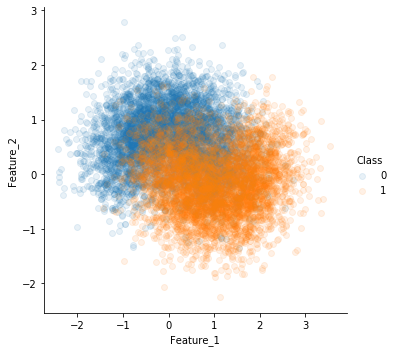

In [64]:
### Visualization using seaborn
# Prepare dataframe
moon_df = pd.DataFrame(X, columns = ['Feature_1', 'Feature_2'])
moon_df['Class'] = y
# Plot
def plot_df(df, features = 2):
    "Plot the data"
    g = sns.FacetGrid(data = df, hue = 'Class', height = 5) # Height (in inches) of each facet.
    g.map(plt.scatter, "Feature_1", "Feature_2", alpha = .1)
    g.add_legend()
    plt.show()
print("\"make_moons\" - Two interleaving half circles")
plot_df(moon_df)

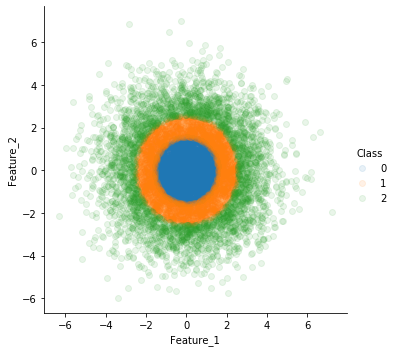

In [31]:
from sklearn.datasets import make_gaussian_quantiles
# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=10000, n_features=2,
                                 n_classes=3, random_state=1)
gauss_df = pd.DataFrame(X1, columns = ['Feature_1', 'Feature_2'])
gauss_df["Class"] = y1
# Plot
plot_df(gauss_df)

<a id='eigenfaces'></a>
## 4. SPECIAL DATA - EIGENFACES

In [56]:
from sklearn.datasets import fetch_lfw_people
### Loading the eigenfaces data
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

In [55]:
# Understand the data
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [47]:
### Check the dataset's attributes
dir(lfw_people)
#=> data: each item in images was flatten into a vector of size (,50X37)

['DESCR', 'data', 'images', 'target', 'target_names']

In [57]:
### number of image, height and width of each image
lfw_people.images.shape

(1288, 50, 37)

The Labeled Faces in the Wild face recognition dataset
Some examples
------------------------------------------------------


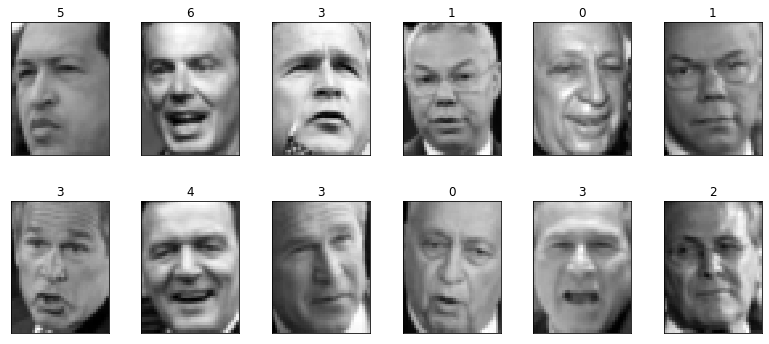

In [67]:
print("The Labeled Faces in the Wild face recognition dataset\nSome examples")
print("------------------------------------------------------")

### Plot some images 2 row, 6 columns (12 images in total)
n_col, n_row = 6, 2
n_samples, h, w = lfw_people.images.shape

plt.figure(figsize = (1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom = 0, left = .01, right = .99, top = .90, hspace = .35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(lfw_people.images[i].reshape((h, w)), cmap = plt.cm.gray)
    plt.title(lfw_people.target[i], size = 12)
    plt.xticks(())
    plt.yticks(())
